In [17]:
#imports 

import os
import sys

from PIL import Image
import numpy as np
import skimage 
from skimage import io, color, filters, feature
import matplotlib.pyplot as plt

%matplotlib inline


In [18]:
#Constants:
#data wd:
WD = '/Users/nikhilarora/data/fydp/sb_images'


In [19]:
skimage.__version__

'0.13.0'

In [20]:
def rev_img(img):
    """reverse img"""
    rev_img = []
    for item in reversed(img):
        rev_img.append(item)
    return np.asarray(rev_img)

def rgb_2_gray(img):
    """converts rgb to grayscale"""
    return np.uint8(color.rgb2gray(img) * 255)


In [21]:
# grab the image and apply required transformations:
img_car = io.imread(os.path.join(WD + '/IMG_9767.JPG'))
img_ncar = io.imread(WD + '/IMG_9769.JPG')

img_car = rev_img(img_car) #reverse image
img_car_gs = rgb_2_gray(img_car) #grey out image
img_ncar = rev_img(img_ncar) #reverse image
img_ncar_gs = rgb_2_gray(img_ncar) #grey out image



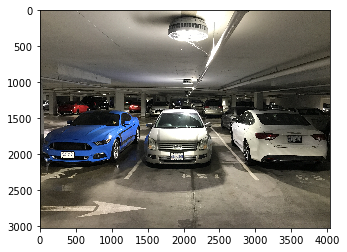

In [22]:
#plot image:
plt.imshow(img_car)

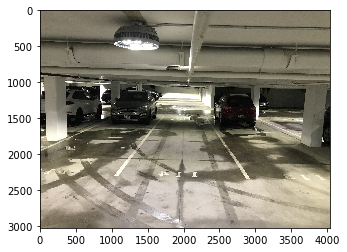

In [23]:
plt.imshow(img_ncar)

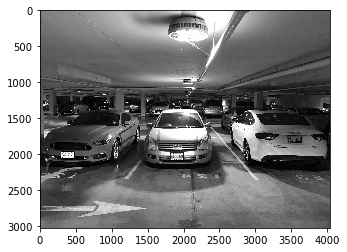

In [24]:
#plot greyed out img:
plt.imshow(img_car_gs, cmap='gray')


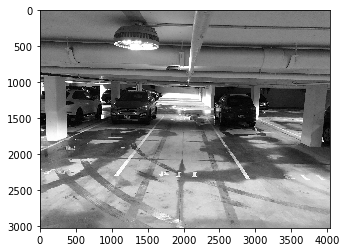

In [25]:
plt.imshow(img_ncar_gs, cmap='gray')


In [26]:
img_copy = img_ncar_gs.copy()
img_copy = skimage.filters.median(img_copy, selem=np.ones((5,5)))


(3024, 4032)
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ..., 146 146 145]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ..., 146 146 145]]


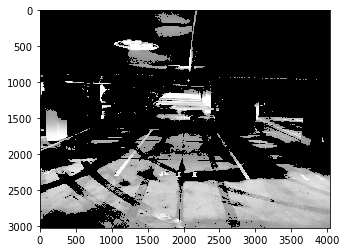

In [27]:
# create and apply mask to image:

img_copy[img_ncar_gs < 145] = 0
print(img_copy.shape)
print(img_copy)
plt.imshow(img_copy, cmap='gray')

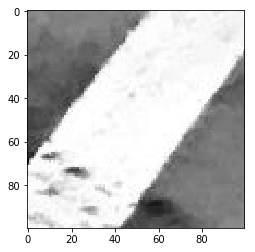

In [28]:
plt.imshow(img_ncar_gs[2000:2500,750:1250][200:300,300:400],cmap='gray')

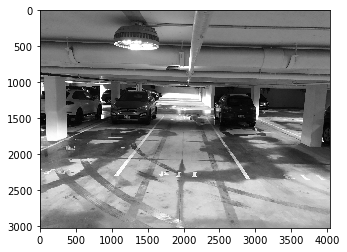

In [29]:
# try to remove some noise using median filter:
img_ncar_denoised = skimage.filters.median(img_ncar_gs, selem=np.ones((5,5)))
plt.imshow(img_ncar_denoised, cmap='gray')

## Attempting to apply Straight line Hough transform¶
http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html


In [30]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


In [31]:
# Classic straight-line Hough transform
h, theta, d = hough_line(img_ncar_denoised)

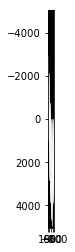

In [32]:
plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)

In [ ]:
f